In [83]:
import numpy as np
import scipy as sp
from scipy import special, integrate
import itertools

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

from IPython.display import HTML
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import animation, rc

## Q1 b)

In [84]:
h = 1
width = 5
group = 1
v_inf = 1/8*group*h**2*(1-4*0**2/h**2)
v_inf

0.125

In [85]:
def l(n):
    l = (2*n+1)*np.pi/h
    return l

In [86]:
def analytic(y,z,r):
    v = 1/8*group*h**2*(1-4*y**2/h**2)
    coe = 4*group*h**2
    for n in range(r):
        v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(width/2)))
    return v

0.12489983882366533


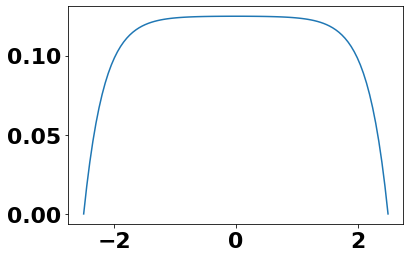

In [87]:
z = np.linspace(-width/2,width/2,100)
mid = analytic(0,0,20)
print(mid) # need to be above 0.1125 to stay with 10% deviation

plt.plot(z, analytic(0,z,20))

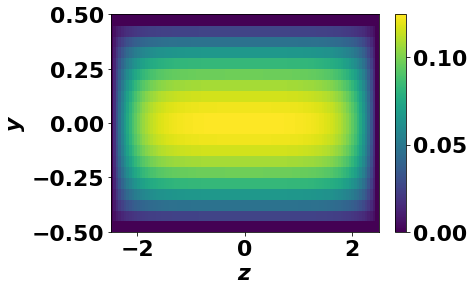

In [88]:
kk = 0.05  # Lenght of each interval
Nz = int(width/kk)
Ny = int(h/kk)

# Plot the solution
zz, yy = np.meshgrid(np.linspace(-width/2, width/2, Nz), np.linspace(-h/2, h/2, Ny))

# Create the analytical solution
u = analytic(yy, zz, 20)

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
zz, yy = np.meshgrid(np.linspace(-width/2, width/2, Nz+1), np.linspace(-h/2, h/2, Ny+1))

plt.pcolor(zz, yy, u)
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.colorbar()

## Q1 c)

In [89]:
kk = 0.05  # Lenght of each interval
Nz = int(width/kk)
Ny = int(h/kk)

# Set tolerance
tolerance = kk**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((Nz+1, Ny+1))

# Create temporary buffer
wn = np.copy(w)
# Iterator
k = 0

#while True:
for n in range(1000):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, Nz), range(1, Ny)):
        wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1] - (kk**2)*(-1))

    w[:, 1]  = 0.0 # x = 0
    w[:, -2] = 0.0 # x = 1
    w[-2, :] = 0.0 # y = 0
    w[1, :]  = 0.0 # y = 1
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:Nz, 1:Ny] = wn[1:Nz, 1:Ny]

    # Increment iteration counter
    k += 1
    
    # Print progress.
    # print('k = {0:d}, error = {1:.4g}'.format(k, error))
    
    if error < tolerance:
        break

print('Required {0:d} iterations!\nError = {1:.4g}.'.format(k, error))
print("numerical: ", w[int(Nz/2),int(Ny/2)], "analytic: ", mid, "error: ", abs(w[int(Nz/2),int(Ny/2)] - mid))
print("numerical: ", w[int(Nz*0.9),int(Ny/2)], "analytic: ", analytic(0,0.4*width,20), "error: ", abs(w[int(Nz*0.9),int(Ny/2)] - analytic(0,0.4*width,20)))

Required 1000 iterations!
Error = 0.02373.
numerical:  0.12489779380709481 analytic:  0.12489983882366533 error:  2.0450165705149237e-06
numerical:  0.09814178461253385 analytic:  0.0982246970100923 error:  8.291239755844892e-05


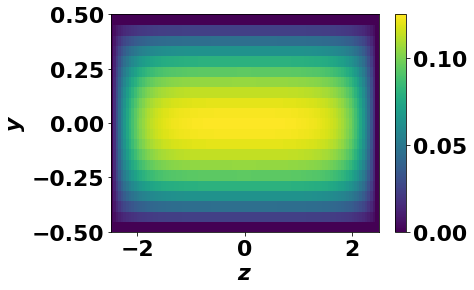

In [90]:
# Plot the solution
zz, yy = np.meshgrid(np.linspace(-width/2, width/2, Nz+2), np.linspace(-h/2, h/2, Ny+2))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(zz, yy, w.T)
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.colorbar()

## 1d)

In [91]:
h = 0.000065           # [m]
width = 0.000065       # [m]
L = 0.6                # [m]
mew = 0.003           # [Pa*s]
deltaP = 12000        # [Pa]

In [92]:
def derivativeOfAnalytic(y,z,r):
    v = deltaP*h/(2*L)
    coe = deltaP*h/(8*L)
    for n in range(r):
        v = v - coe* -32 / ((2*n+1)**2*np.pi**2)*(np.cosh(l(n)*z))*(1/np.cosh(l(n)*(width/2)))
    return v

Text(0, 0.5, 'Pressure [Pa]')

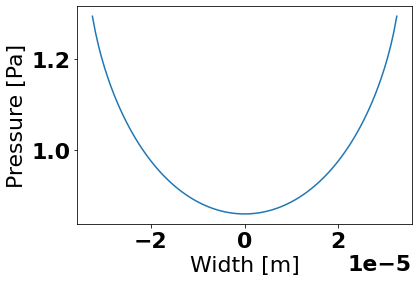

In [93]:
z = np.linspace(-width/2,width/2,100)

plt.plot(z, derivativeOfAnalytic(-h/2,z,20))
plt.xlabel("Width [m]")
plt.ylabel("Pressure [Pa]")

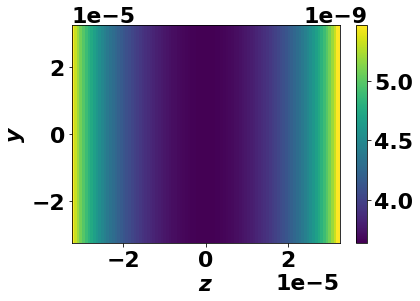

In [98]:
kk = 0.00000065    # Lenght of each interval
Nz = int(width/kk)
Ny = int(h/kk)

# Plot the solution
zz, yy = np.meshgrid(np.linspace(-width/2, width/2, Nz), np.linspace(-h/2, h/2, Ny))

# Create the analytical solution
u = width*h*derivativeOfAnalytic(yy, zz, 20)

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
zz, yy = np.meshgrid(np.linspace(-width/2, width/2, Nz+1), np.linspace(-h/2, h/2, Ny+1))

plt.pcolor(zz, yy, u)
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.colorbar()